# <center><font color='Purple'>Determination of Area from Land-Cover Map of Texas</font></center>

<center><font color='purple'>PURPLE TEAM</font></center>
<leftside><font color='purple'>Team Members:</font></leftside>

 
       1. PARTHA PROTIM ROY
    
       2. CHOWDAIAH NAIDU THIMMISETTY
       
       3. KOTESH ALUGUBELLY (Contributor)

   <side>Professor :     Dr. Venkatesh Uddameri</side>
   


# Land Cover Map for Texas

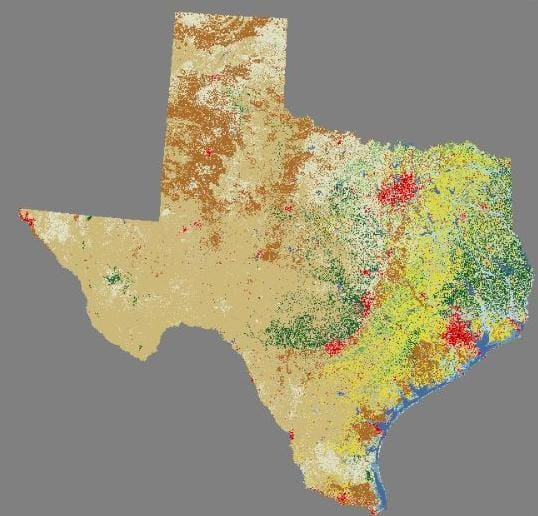

# LULC Classification

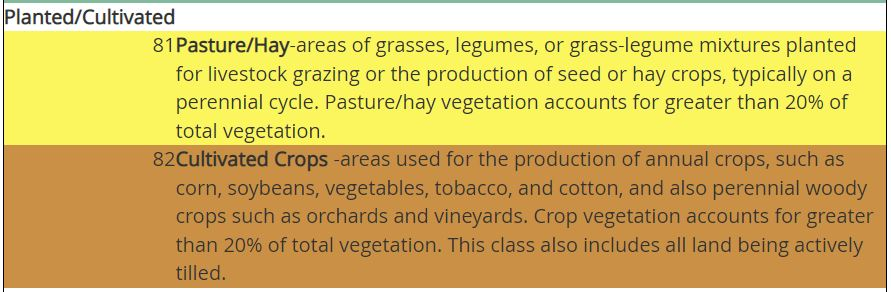

# Importing libraries

In [26]:
from osgeo import gdal
import pandas as pd
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import array as arr

# Reading files

In [38]:
fn = "/Users/koteshalugubelly/Downloads/nlcd19_48_lc/nlcd_2019_land_cover_l48_20210604_TX.img"

In [39]:
ds = gdal.Open(fn)

In [40]:
print("'ds' type", type(ds))

'ds' type <class 'osgeo.gdal.Dataset'>


In [41]:
print("Projection: ", ds.GetProjection())  # get projection
print("Columns:", ds.RasterXSize)  # number of columns
print("Rows:", ds.RasterYSize)  # number of rows
print("Band count:", ds.RasterCount)  # number of bands

Projection:  PROJCS["WGS_1984_Albers",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Columns: 44254
Rows: 41260
Band count: 1


# Defining the array

In [42]:
data_array = ds.GetRasterBand(1).ReadAsArray()
data_array.shape

(41260, 44254)

In [33]:
print("type of 'data_array' ", type(data_array))

type of 'data_array'  <class 'numpy.ndarray'>


In [34]:
41260 * 44254

1825920040

In [10]:
data_array

array([[-128, -128, -128, ..., -128, -128, -128],
       [-128, -128, -128, ..., -128, -128, -128],
       [-128, -128, -128, ..., -128, -128, -128],
       ...,
       [-128, -128, -128, ..., -128, -128, -128],
       [-128, -128, -128, ..., -128, -128, -128],
       [-128, -128, -128, ..., -128, -128, -128]], dtype=int8)

In [11]:
a=np.unique(data_array)
a

array([-128,    0,   11,   21,   22,   23,   24,   31,   41,   42,   43,
         52,   71,   81,   82,   90,   95], dtype=int8)

In [12]:
# Extract the pixel data of pasture/Hay.
a = data_array  == 81

 
# This will return elements that satisfy condition "b" condition
print("\nElements that satisfy condition a  : \n", np.extract(a, data_array))



Elements that satisfy condition a  : 
 [81 81 81 ... 81 81 81]


In [13]:
b=np.extract(a, data_array)

In [43]:
type(b)          #find 'b' type

numpy.ndarray

In [14]:
# find the length of numpy array b.
print("\nElements that satisfy condition a=81 : \n",len(b))


Elements that satisfy condition a=81 : 
 75432950


## Area of Pasture/Hay

In [15]:
Area81= 75432950*30*30
print("\n Pasture or hay area : \n",Area81)


 Pasture or hay area : 
 67889655000


In [16]:
# Extract the pixel data of cultivated crops
c = data_array  == 82

 
# This will return elements that satisfy condition "b" condition
print("\nElements that satisfy condition a  : \n", np.extract(c, data_array))


Elements that satisfy condition a  : 
 [82 82 82 ... 82 82 82]


In [17]:
d=np.extract(c, data_array)

In [44]:
type(d)

numpy.ndarray

In [18]:
# find length of array
print("\nElements that satisfy condition c=82 : \n",len(d))


Elements that satisfy condition c=82 : 
 94867328


## Area of Cultivated crops

In [19]:
Area82= 94867328*30*30
print("\n Cultivated crop area : \n",Area82)


 Cultivated crop area : 
 85380595200


In [20]:
print("'d' type", type(d))

'd' type <class 'numpy.ndarray'>


# Plotting Pasture/Hay map

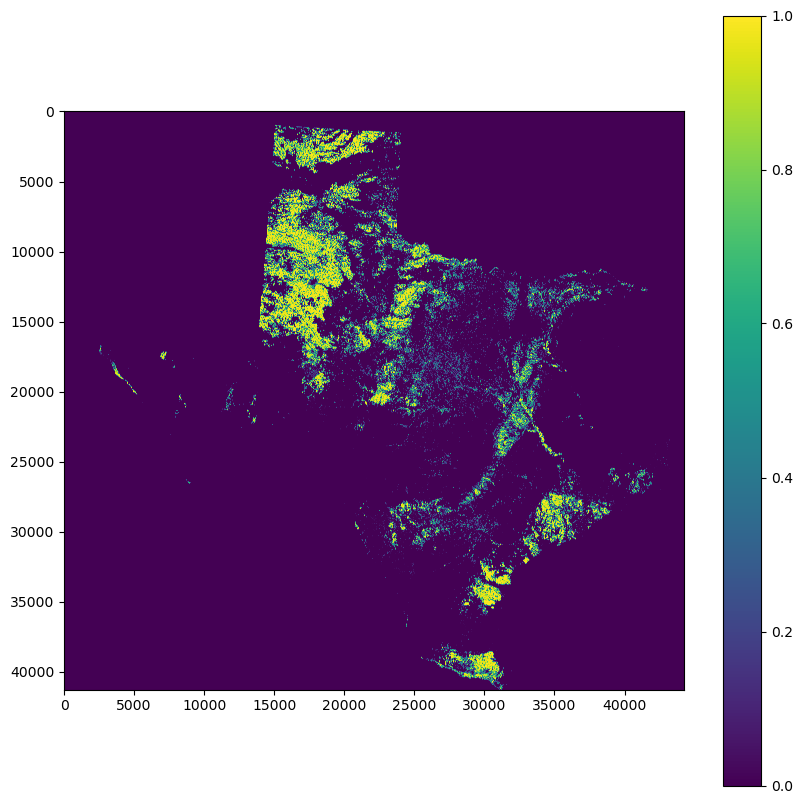

In [23]:
plt.figure(figsize=(10, 10))
plt.imshow(data_array==82)
plt.colorbar()

# Plotting Cultivated Crops map

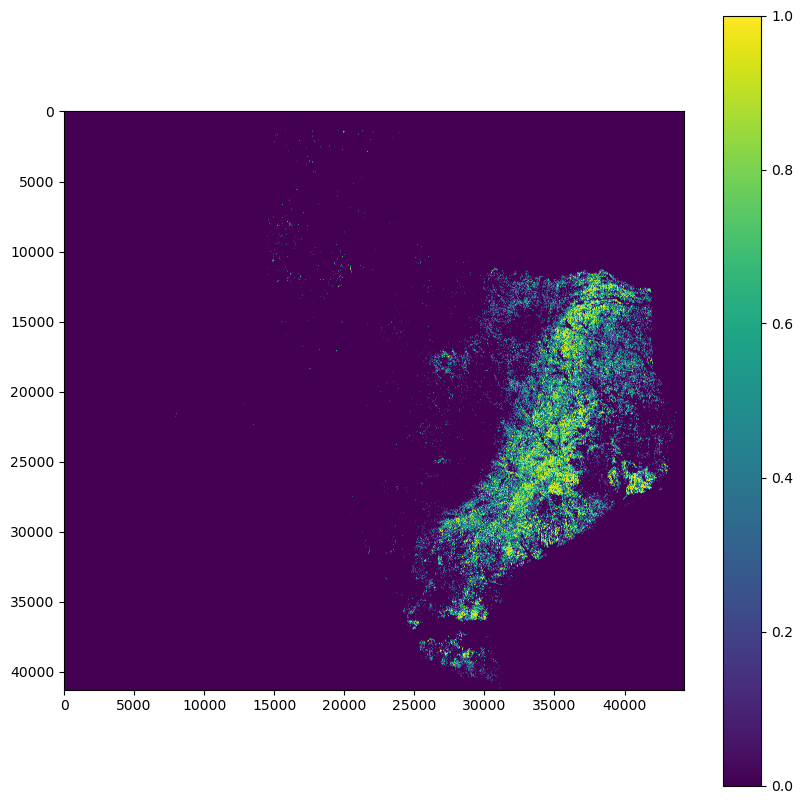

In [25]:
plt.figure(figsize=(10, 10))
plt.imshow(data_array==81)
plt.colorbar()
